# Final Project - INFO6150 - Data Science Engineering Methods

# Topic - Craigslist Used Car Price Prediction

   ##### Team Members :- 
   - Neeraja Dixit - 001584742
   - Kunal Desai - 002193570

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px




In [3]:
df=pd.read_csv(r'E:\MS_STUDY\Study\AA_SEM_2\DSE\Project\vehicles.csv')

In [106]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [107]:
df.shape

(458213, 26)

In [108]:
df.columns


Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [109]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

Looking at the total number of columns, it seems that the below columns would not contribute much in predicting the car prices. Hence, we can drop them.
Columns to be dropped:-
   - 'Unnamed : 0'
   - 'id'
   - 'url'
   - 'region_url'
   - 'image_url'
   - 'VIN'

In [110]:
df.drop(['Unnamed: 0', 'id','url','region_url','image_url','VIN','posting_date'], axis=1, inplace=True)

In [111]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long'],
      dtype='object')

###### Also, the 'description' column won't seem to add much value to the model. Thus, dropping that as well.

In [112]:
df=df.drop('description',axis=1)

In [113]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long'],
      dtype='object')

In [114]:
df.shape

(458213, 18)

In [115]:
df[['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat',
       'long']].head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al,32.590000,-85.480000
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al,32.547500,-85.468200
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al,32.616807,-85.464149
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,32.861600,-85.216100
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200


###### Finding NULLs in the dataset

In [116]:
def missingValuesPercentCheck():
    
    column_null=df.isnull().sum()#finding the sum of total null values in the dataset
    column_list=df.columns.values#finding the list of columns 

    #printing percentage of null values for each feature.
    missing_values={'Feature':[],'Missing %':[]}
    for i in range(len(column_list)):
        missing_values.get('Feature').append(column_list[i])
        missing_values.get('Missing %').append((column_null[i]/df.shape[0])*100)
    return pd.DataFrame(missing_values)


In [117]:
missingValuesPercentCheck()


,Feature,Missing %
0,region,0.000000
1,price,0.000000
2,year,0.229151
3,manufacturer,3.976317
4,model,1.057587
5,condition,42.107055
6,cylinders,37.349442
7,fuel,0.706440
8,odometer,12.069278
9,title_status,0.562402


<AxesSubplot:>

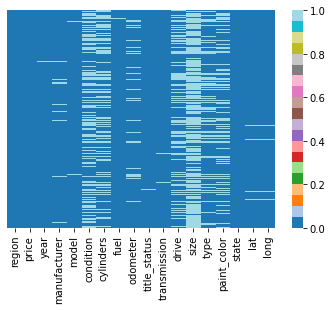

In [118]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='tab20')

As we have 70% of the data in Size column as NULL, we can conclude that the Size column will not contribute towards delivering good accuracy. Hence, we decide on dropping the Size column. 

In [119]:
df=df.drop('size',axis=1)

In [120]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'lat', 'long'],
      dtype='object')

In [121]:
df.shape

(458213, 17)

## NULL value removal

Below are the Numerical and Categorical attributes that we have in our dataset.
From the above findings, we understand that we do not have a huge number of NULL values in Numerical attributes. To impute the available ones, we will be using Mean of the dataset.

To fill the NULL values in Categorical attributes, we will be using LabelEncoder. 

In [122]:
numeric_col=['year','odometer','lat','long']
categorical_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color', 'state']

In [123]:
df.isnull().sum()[numeric_col]

year         1050
odometer    55303
lat          7448
long         7448
dtype: int64

In [124]:
df.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
458208,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,SUV,silver,wi,44.408867,-89.881210
458209,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,SUV,white,wi,44.408867,-89.882240
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,coupe,black,wy,44.784900,-106.964800
458211,wyoming,1300,2008.0,jeep,grand cherokee,good,8 cylinders,gas,164000.0,clean,automatic,4wd,SUV,white,wy,44.773500,-106.939600
458212,wyoming,22900,2008.0,NaN,International 4300,NaN,NaN,diesel,164000.0,clean,automatic,NaN,NaN,NaN,wy,42.117656,-88.436954


In [125]:
df[['year','odometer','lat','long']].mean()

year          2010.746067
odometer    101669.756941
lat             38.531925
long           -94.375824
dtype: float64

In [32]:
df['lat'].dtype

dtype('float64')

#### Removing NULLs from Numeric columns below

In [127]:
df["year"]=df["year"].fillna(df["year"].mean().astype('int'))

odoMean=df['odometer'].mean()
odoMean1=float(round(odoMean))
df["odometer"]=df["odometer"].fillna(odoMean1)

df["lat"]=df["lat"].fillna(df["lat"].mean())
df["long"]=df["long"].fillna(df["long"].mean())


In [128]:
df.isnull().sum()[numeric_col]

year        0
odometer    0
lat         0
long        0
dtype: int64

In [164]:

df.isnull().sum()[categorical_cols]

region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

### Imputer Method for Categorical attributes

In [130]:

from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from tqdm import tqdm

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [131]:
check_imputer=df.copy()
#check_imputer=check_imputer.drop(columns=['id'])

#object of LabelEncoder
encoder=preprocessing.LabelEncoder()

#function to label the categorical columns ignoring null values 
def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#loop to label each column or categorical values into numberic
for i in tqdm(range(len(categorical_cols))):
    encode(check_imputer[categorical_cols[i]])

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]C:\Users\kunal\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunal\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.70it/s]


### Imputing NULLs in Categorical columns

In [132]:
categoricalData=df[categorical_cols]
encoder=preprocessing.LabelEncoder()

#create a for loop to iterate through each column in the data
for columns in categorical_cols:
    encode(categoricalData[columns])
    imputer = IterativeImputer(BayesianRidge())
    impute_data=imputer.fit_transform(categoricalData[columns].values.reshape(-1, 1))
    impute_data=impute_data.astype('int64')
    impute_data = pd.DataFrame(impute_data)
    impute_data =encoder.inverse_transform(impute_data.values.reshape(-1, 1))
    categoricalData[columns]=impute_data
df[categorical_cols]=categoricalData   

C:\Users\kunal\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-132-a5e19913aa44>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricalData[columns]=impute_data
C:\Users\kunal\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunal\AppData\Roaming\Python\Python39\site-packages\p

C:\Users\kunal\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kunal\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-132-a5e19913aa44>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricalDa

In [133]:
#Missing values after filling
df.isnull().sum()[categorical_cols]

region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

## Outlier detection and removal

In [ ]:
plt.figure(figsize=(12,8))
plt.boxplot(df['owned_hotels'])

In [134]:
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

C:\Users\kunal\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


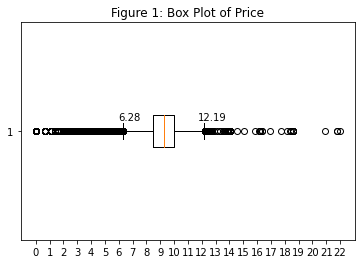

In [135]:
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
df['logprice'] = np.log(df['price'])
x=df['logprice']
price_range=list(range(0,int(max(df['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(df)[0]-0.3,1.05,str(round(min_max_price(df)[0],2)))
plt.text(min_max_price(df)[1]-0.5,1.05,str(round(min_max_price(df)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('graph-boxplot-price.jpg')
plt.show()

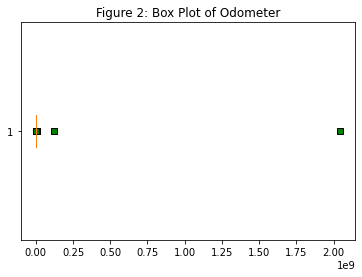

In [136]:
fig, ax1 = plt.subplots()
ax1.set_title('Figure 2: Box Plot of Odometer')
ax1.boxplot(df['odometer'], vert=False, flierprops=red_square)
plt.savefig('graph-boxplot-odometer.jpg')
plt.show()

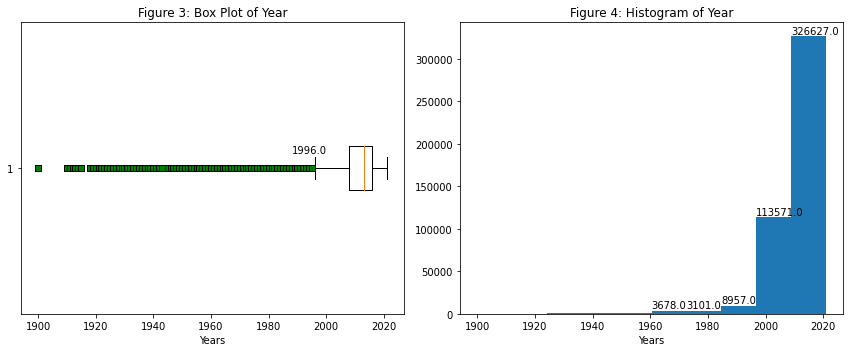

In [137]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#ploting boxplot
o1,o2=outliers(df,'year')
ax1.boxplot(sorted(df['year']), vert=False, flierprops=red_square)
ax1.set_xlabel("Years")
ax1.set_title("Figure 3: Box Plot of Year")
ax1.text(o1-8,1.05,str(round(o1,2)))

#ploting histogram
hist,bins=np.histogram(df['year'])
n, bins, patches = ax2.hist(x=df['year'], bins=bins)
ax2.set_xlabel("Years")
ax2.set_title("Figure 4: Histogram of Year")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('graph-barplot-histogram-year.jpg',dpi=1200)
plt.show()

In [138]:
#removing outliers 
df_new=df.copy()
out=np.array(['logprice','odometer','year'])
for col in out:
    o1,o2=outliers(df_new,col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new=df_new[df_new['price']!=0]
df_new.drop('logprice',axis=1,inplace=True)

IQR of logprice = 6.279112766851223 12.19345334617788
IQR of odometer = -74955.0 252973.0
IQR of year = 1996.0 2028.0


In [139]:
df_new.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,other,grey,al,32.590000,-85.480000
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,grey,al,32.547500,-85.468200
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,4wd,SUV,blue,al,32.616807,-85.464149
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,al,32.547500,-85.468200
5,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,4wd,pickup,red,al,32.590000,-85.480000


In [140]:
df=df_new.copy()

## Label Encoding to convert Categorical to numeric

In [141]:
le=preprocessing.LabelEncoder()
df[categorical_cols]=df[categorical_cols].apply(le.fit_transform)

In [142]:
df.head(2)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,16,35990,2010.0,7,9060,2,6,2,32742.0,0,2,2,7,5,1,32.5900,-85.4800
1,16,7500,2014.0,18,21800,0,3,2,93600.0,0,0,1,9,5,1,32.5475,-85.4682


## Data Scaling

In [143]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [144]:
norm = StandardScaler()
df['price'] = np.log(df['price'])
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))

#scaling target variable
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]

df['region'] = norm.fit_transform(np.array(df['region']).reshape(-1,1))
df['lat'] = norm.fit_transform(np.array(df['lat']).reshape(-1,1))
df['long'] = norm.fit_transform(np.array(df['long']).reshape(-1,1))

In [171]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,-1.500978,10.490996,-0.350290,7,-0.745180,2,6,2,-1.091956,0,2,2,7,5,1,-1.019470,0.480432
1,-1.500978,8.922658,0.406236,18,1.153011,0,3,2,0.007515,0,0,1,9,5,1,-1.026721,0.481097
2,-1.500978,8.496990,-1.106816,4,1.593290,2,5,2,-0.110891,0,0,0,0,1,1,-1.014896,0.481325
4,-1.500978,9.878170,-1.295948,13,-0.165293,0,6,0,0.412198,1,0,0,8,1,1,-1.026721,0.481097
5,-1.500978,10.295192,0.784500,40,1.283679,2,5,2,-1.082056,0,2,0,8,8,1,-1.019470,0.480432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,1.600544,9.615472,0.406236,6,1.218122,0,5,2,-0.169714,0,0,0,0,9,48,0.997071,0.232424
458209,1.600544,9.792277,1.162763,18,1.450702,0,3,2,-1.107385,0,0,0,0,10,48,0.997071,0.232366
458210,1.727309,9.792556,0.406236,6,-0.676792,0,5,2,-0.725972,0,0,0,3,0,50,1.061230,-0.730236
458211,1.727309,7.170120,-0.728553,21,0.064606,2,6,2,1.279374,0,0,0,0,10,50,1.059285,-0.728816


## Split Data

In [249]:

from sklearn.model_selection import train_test_split

#function to split dataset int training and test
def trainingData(df,n):
    X = df.drop(columns=["price"], axis=1).to_numpy()
    y = df["price"].to_numpy()
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))

In [224]:
y_test.shape

(38934,)

In [253]:
X_train

array([[ 1.73576045e+00,  2.79733022e-02,  1.80000000e+01, ...,
         4.70000000e+01,  1.36756153e+00, -1.49253419e+00],
       [ 5.61069313e-01,  9.73631228e-01,  7.00000000e+00, ...,
         9.00000000e+00, -1.69237446e+00,  7.12974779e-01],
       [-1.63619469e+00, -3.50289868e-01,  2.40000000e+01, ...,
         4.00000000e+00,  5.48531896e-03, -1.54376776e+00],
       ...,
       [-1.55168453e+00, -1.48507938e+00,  1.30000000e+01, ...,
         2.00000000e+01,  8.80448332e-02,  9.83203616e-01],
       [ 7.38540637e-01, -1.48507938e+00,  8.00000000e+00, ...,
         1.40000000e+01,  3.39392741e-01,  1.96944480e-01],
       [-1.12913377e+00,  4.06236472e-01,  3.20000000e+01, ...,
         4.20000000e+01, -3.40561753e-01,  3.71949130e-01]])

In [217]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])    

## Linear Regression Model

In [103]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

In [240]:


from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error

#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [233]:
y_test

array([8.83927669, 8.50714286, 9.66459564, ..., 9.85193107, 8.69951475,
       8.95544812])

In [234]:
y_pred.shape

(38934,)

In [235]:
y_test_1,y_pred_1=remove_neg(y_test,y_pred)

In [236]:
y_test_1

array([8.83927669, 8.50714286, 9.66459564, ..., 9.85193107, 8.69951475,
       8.95544812])

In [237]:
y_pred_1

array([11.670819  ,  6.66834267,  7.9550253 , ...,  9.67207906,
        9.41681873, 11.20749357])

In [241]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)

r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-6.66694935e-05  4.78581826e-01  3.84628255e-05 -1.24089460e-03
 -3.04729775e-02  2.19981982e-01 -2.15969298e-01 -2.13040272e-01
 -8.43846968e-02  7.02096909e-02 -7.38674281e-02 -3.34540196e-04
  3.72636908e-03  1.78211204e-04 -4.24438240e-04 -6.19646947e-02]
MSLE : 0.0027521615355246987
Root MSLE : 0.052461047792859594
R2 Score : 0.6226492447549415 or 62.2649%


In [243]:
X_train = pd.DataFrame(X_train)

In [248]:
X_train.columns

RangeIndex(start=0, stop=16, step=1)

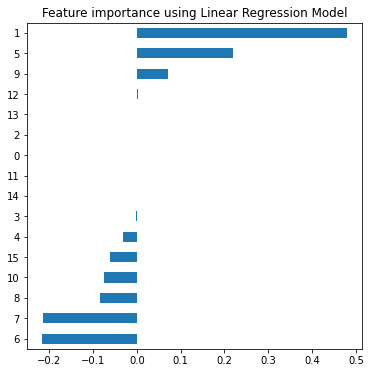

In [245]:
#Ploting feature importance graph



import matplotlib
import matplotlib.pyplot as plt

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

In [ ]:
df['fuel'].unique()

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x='fuel',y='price',palette=["red", "green", "blue", "goldenrod", "magenta"])
plt.title('Fuel Type Vs Price ')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
sns.despine()
plt.show()



In [ ]:
grp = df.groupby(['fuel']).size().reset_index(name='counts')

pieChart = px.pie(grp, values='counts', names='fuel',  title='Fuel Type Distribution',
                  color_discrete_sequence=px.colors.qualitative.Set2)
pieChart.show()

# Dropping description column as that column is of no use to us

In [ ]:
df=df.drop('description',axis=1)

In [ ]:
df['state']=df['state'].apply(lambda x : x.upper())

In [ ]:
df1=df.groupby(by=df['state'], as_index=False).mean()

In [ ]:
df1=df1[['state','price']]

In [ ]:
fig = px.choropleth(df1,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='price',
                    color_continuous_scale="Reds", 
                    
                    )
fig.show()


In [ ]:
df.nunique()

In [ ]:
df_year=df[['year','price','transmission']]
df_year=df_year.dropna()
df_year['year']=df_year['year'].apply(lambda x : int(float(x)))

In [ ]:
df_year.isnull().sum()

In [ ]:
df_sort=df_year.sort_values('year')

In [ ]:
df['price'].describe()

In [ ]:
fig = px.bar(df_sort, x="transmission", y="price",color=df_sort['transmission'],
  animation_frame="year", range_y=[0,2.149500e+07])
fig.update_layout(title=" transmission through the years", xaxis_title="Type",yaxis_title="Values",
                  legend_title="Type")
fig.update_xaxes(tickangle=12,title_standoff = 5,rangeselector_font_size=12,)

fig.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.set_palette('Set2')
sns.barplot(x=df['condition'],y=df['price'])
plt.title('Condition Vs Price ')
plt.xlabel('Condition')
plt.ylabel('Price')
sns.despine()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.set_palette("husl", 8)
sns.barplot(x=df['cylinders'],y=df['price'])
plt.title('Cylinders Vs Price ')
plt.xlabel('Cylinders')
plt.ylabel('Price')
sns.despine()
plt.show()